# Part 3: HIV treatment using ODE simulation and reinforcement learning

### Introduction

Discovering effective treatment strategies for HIV remains a significant challenge in medical research. To date, the clinically effective way to treat HIV is using a combination of anti-HIV drugs named as anitretrovirals to inhibit the development of drug resistant HIV strains. Anti-HIV drugs are currently grouped into two main categories: Reverse Transcriptase inhibitors(RTI) and Protease Inhibitors(PI). RTIs prevent HIV RNA from being converted into DNA which blocks the virus replication process initiated in the infected cell. PIs work at the final stage of viral replication and attempt to prevent HIV from making new copies of itself by interfering with the HIV protease enzyme. This prevents new copies of HIV from infecting new cells. 

Although the combination of these drugs reduce and maintain the viral loads below the detection limit, their long term use can lead to complications and patients often experience side-effects thus leading to poor compliance. Effective drug scheduling strategies have been proposed to address this concern. The goal of drug-scheduling strategy is to bring the immune system into a state that allows it to independently maintain immune control over the virus. Also, transfer to a drug-independent viral control situation needs to be done with as low systemic effects as possible.

Structured treatment interruption (STI) is one such strategy which has received a lot of attention. In STI, the patient is cycled on and off drug therapy. Since STI involves periods of relief from treatment, it is well received by the patients. When the treatment is interrupted, viral load increases to a high level which leads to activating adaptive immune response. Repeated STI simulations has been observed to maintain immune control over the virus in the absence of treatment.

### Background

Previous studies have explored uzing mathematical models of HIV infection dynamics for addressing the problem of designing STI treatments. These models are usually represented by a set of Ordinary Differential Equations(ODEs) and control theory is applied to deduce STI strategies. Modeling the HIV infection dynamics is a complex task and along with selecting the right parametric system of ODEs, one must fit their parameters to reflect quantitatively biological observations. Two main approaches have been proposed:

1. Control theory based studies first state an optimality criterion and then search for control strategies optimizing this criterion. 
2. Reinforcement Learning(RL) computes control strategy directly from the measured trajectories and does not need the apriori identification of model of system dynamics.

In  this  project,  we  investigate the feasibility of using RL to determine optimal dosing strategy for clinical data. We use simulation to artificially generate the HIV clinical data. This is because of limited availability of publicly available HIV datasets.

### Conceptual Model Diagram

<img src="conceptual_diagram.png">

### 3.1 HIV Simulation Model

**Exercise 1** : (20 points) Design and implement a continous time model system for simulating the dynamics of viral load and infected cells under STI strategy. The model should take into consideration that the patient characteristics can change and allow adjustment of drug combinations (RTI and PI) to study the impact on patient's condition and viral dynamics.

**Exercise 1.1**: Write an ordinary differential equation to model the system.

We use the mathematical model proposed by Adams et. al.[1]. The model is a continuous ODE formulation. Although modeling HIV infection requires taking into consideration multiple factors, we can choose a small subset of these factors to keep our model simple. The proposed model includes the following patient wellness indicators, which adequately describe patient's condition (state) at a particular time:

1. $T1$ : Infected CD4+ cells
2. $T1^*$ : Non-infected CD4+ cells
3. $T2$ : Infected macrophages
4. $T2^*$ : Non-infected macrophages
5. $V$ : HIV Viral Load (RNA copies per ml of blood)
6. $E$ : Immune effector CD8+ cells which measure the body's immune response to the presence of infected T-cells

The model should also include the action of commonly used antiretrovirals and allow using a combination of RTI and PI drugs which are major classes of drugs used for HIV treatment. We define drug efficacy parameters $\epsilon_1$ and $\epsilon_2$ for this reason. $\epsilon_1$ models a reverse transcriptase(RT) inhibitor and is more effective in maintaining population of CD4+ cells ($T1$) while $\epsilon_2$ models the PT inhibitor. The efficacy of the drug is controlled using $f \in [0,1]$ and $f*\epsilon$ defines the overall impact of the drug.

The populations of uninfected $T1$ and $T2$ cells have different birth rates ($\lambda_i$) and death rates ($d_i$). A complete description of the model along with the parameters is included below:

#### Model Equations

These equations describe the complete dynamics of the state **s = $[T1,T2,T1^*,T2^*,V,E]$** of the model:

$$
\begin{eqnarray}
  \dfrac{d\vec{s}}{dt}
  = \dfrac{d}{dt}\left(\begin{matrix}
      T_1(t) \\
      T_2(t) \\
      T_1^*(t) \\
      T_2^*(t) \\
      V(t) \\
      E(t)
    \end{matrix}\right)
  & = & \left(\begin{matrix}
     \lambda_1 − d_1 T_1(t) − (1−\epsilon_1) k_1 V(t) T_1(t) \\ 
      \lambda_2 − d_2 T_2(t) −(1−f*\epsilon_1)k_2 V(t) T_2(t) \\
      (1−\epsilon_1) k_1 V(t) T_1(t) − \delta T_1^*(t) −m_1 E(t) T^*_1(t) \\
      (1−f \epsilon_1) k_2 V(t) T_2(t) − \delta T_2^*(t) − m_2 E(t) T^*_2(t) \\
      (1−\epsilon_2) N_T \delta[T_1^*(t) + T_2^*(t)] - c V(t) - [(1-\epsilon_1) \rho_1 k_1 T_1(t) + (1-f \epsilon_1) \rho_2 k_2 T_2(t))] V(t) \\
        \lambda_E + \frac{b_E(T_1^*(t) + T_2^*(t))}{T_1^*(t) + T_2^*(t) + K_b}E - \frac{d_E(T_1^*(t) + T_2^*(t))}{T_1^*(t) + T_2^*(t) + K_d}E - \delta_E E
    \end{matrix}\right)
  \equiv \vec{F}(\vec{s}),
\end{eqnarray}
$$

#### Model Parameters

| Parameters | Value of Parameters | Description |
| --- | --- | --- |
| $\lambda_1$ | 10000 | production rate of CD4+ cells |
| $d_1$ | 0.01 | death rate of CD4+ cells |
| $\epsilon_1$ | $[0,1)$ | efficacy of RTI |
| $\epsilon_2$ | $[0,1)$ | efficacy of PI |
| $k_1$ | $8.0*10^{-7}$ | infection rate of CD4+ cells |
| $\lambda_2$ | 31.98 | production rate of macrophages |
| $d_2$ | 0.01 | death rate of macrophages |
| $f$ | 0.34 | reduction of treatment efficacy for macrophages |
| $k_2$ | $1.0*10^{-4}$ | infection rate of macrophages |
| $\delta$ | 0.7 | death rate of infected cell |
| $m_1$ | $1.0*10^{-5}$ | immune-induced clearance rate for CD4+ cells |
| $m_2$ | $1.0*10^{-5}$ | immune-induced clearance rate for macrophages |
| $N_T$ | 100 | virions produced per infected cell |
| c | 13 | natural death rate of virus |
| $\rho_1$ | 1 | average number of virions infecting a CD4+ cell |
| $\rho_2$ | 1 | average number of virions infecting a macrophage |
| Immune effector parameters|  |  |
| $\lambda_E$ | 1 | production rate of immune effector/cytotix T-cell |
| $b_E$ | 0.3 | maximum birth rate for cytotoxic T-cell |
| $K_b$ | 100 | saturation constant for cytotoxic T-cell birth |
| $d_E$ | 0.25 | maximum death rate for cytotoxic T-cell |
| $K_d$ | 500 | saturation constant for cytotoxic T-cell death |
| $delta_E$ | 0.1 | natural death rate of cytotoxic T-cells |

In [1772]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import jdc
from scipy.integrate import odeint, ode
from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections
import seaborn as sns
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Step 1
We define our ODE model equations here to compute $\frac{d\vec{s}}{dt}$. The function returns the derivative $ds$. We also pass the drug efficacy parameter ($f$) along with the efficacy parameters $\epsilon_1$ and $\epsilon_2$.
Since the model parameters defined above can vary between individuals, we pass an additional list variable named _params_ which allow us to simulate the impact of better immune system on the overall dynamics of HIV virus.

In [1773]:
def derivs_dt(s,t=0,eps1=0,eps2=0,f=0.34,params=None):
    t1,t2,t11,t21,v,e = s
    if params is None:
        lambda1 = 1e4    
        lambda2 = 31.98   
        d1 = 0.01         
        d2 = 0.01        
        f = f           
        k1 = 8e-7        
        k2 = 1e-4         
        delta = .7        

        NT = 100.         
        c = 13.           
        rho1 = 1.         
        rho2 = 1.        
        deltaE = 0.1     
        lambdaE = 1
        m1 = 1e-5
        m2 = 1e-5
        bE = 0.3
        Kb = 100
        d_E = 0.25
        Kd = 500
    else:
        lambda1,lambda2,d1,d2,k1,k2,delta,NT,c,rho1,rho2,deltaE,lambdaE,m1,m2,bE,Kb,d_E,Kd = params
    
    ds = s.copy()
    
    tmp1 = (1-eps1) * k1 * v * t1
    tmp2 = (1-f*eps1) * k2 * v * t2
    ds[0] = lambda1 - d1 * t1 - tmp1
    ds[1] = lambda2 - d2 * t2 - tmp2
    ds[2] = tmp1 - delta * t11 - m1 * e * t11
    ds[3] = tmp2 - delta * t21 - m2 * e * t21
    ds[4] = (1-eps2) * NT * delta * (t11 + t21) - c * v - ((1. - eps1) * rho1 * k1 * t1 + (1. - f * eps1) * rho2 * k2 * t2) * v
    ds[5] = lambdaE + bE * (t11 + t21) / (t11 + t21 + Kb) * e - d_E * (t11 + t21) / (t11 + t21 + Kd) * e - deltaE * e
    return ds

**Exercise 1.2**(5 points) Find fixed points of the system (without treatment) and perform their stability analysis.

At steady state, $\frac{d\vec{s}}{dt} = 0$. However, since the equations are slightly complicated here, we utilize the _fsolve_ function to solve for steady state. We assume the standard model parameters and drug efficacy $(\epsilon_1,\epsilon_2)$ is set to zero. We also consider states with positive state variables.

In [1779]:
from scipy.optimize import fsolve
x02 = []
for i in range(5000):
    x = np.random.uniform(0,100000,6)
    x_temp = fsolve(derivs_dt, x)
    x_temp_sum = np.sum(np.abs(derivs_dt(x_temp)))
    
    if (x_temp>=0).all() and x_temp_sum < 1e-7:
        x02.append(np.round(x_temp))
x_final = np.unique(x02,axis=0)
print("Fixed points of the system")
for x in x_final:
    print(x)

/home/achoudhary/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/home/achoudhary/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Fixed points of the system
[163573.      5.  11945.     46.  63919.     24.]
[664938.     50.   1207.     11.   6299. 207658.]
[967839.    621.     76.      6.    415. 353108.]
[1000000.    3198.       0.       0.       0.      10.]


Adams et. al. highlight that when both $\epsilon_1$ and $\epsilon_2$ are zero, the dynamic model achieves four physical equilibrium points with all state variables being non-negative.

1. Uninfected individual - $(T_1,T_2,T_1^*,T_2^*,V,E)$ = $(10000000,3,198,0,0,0,10)$ 
2. Infected individual - $(T_1,T_2,T_1^*,T_2^*,V,E)$ = $(664938,50,1207,11,6299,207658)$ 
3. Infected individual - $(T_1,T_2,T_1^*,T_2^*,V,E)$ = $(967839,621,76,6,415,353108)$ 
4. Infected individual - $(T_1,T_2,T_1^*,T_2^*,V,E)$ = $(163573,5,111945,46,63919,24)$ 

State 3 corresponds to an individual with good immune control over the virus while state 4 represents an individual in unhealthy state whose viral load is considerably elevated and T-cells are in short-supply in absence of treatment.

#### Analyze stability of fixed points
To analyze the stability of fixed points, we compute the eigenvalues of Jacobian matrix given by
$$
\frac{d\vec{s}}{dt} = \mathbf{J}\vec{s} 
$$

$$\mathbf{J} = \begin{bmatrix} -d_1-k_1 V & 0 & 0 & 0 & -k_1 T_1 & 0 \\ 
0 &-d_2-k_2 V & 0 & 0 & -k_2 T_2 & 0 \\
k_1 V & 0 & -\delta-m_1 E & 0 & k_1 T_1 & -m_1 T^*_1 \\
0 & k_2*V & 0 & -\delta-m_2 E & k_2 T_2 & -m_2 T_2^* \\
-\rho_1 k_1 V & -\rho_2 k_2 V & \delta N_T & \delta N_T & -c-\rho_1 k_1 T_1-\rho_2 k_2 T_2 & 0 \\
 0 & 0 & J_{6,3} & J_{6,4} & 0 & J_{6,6}
\end{bmatrix} $$

$$
J_{6,3} = J_{6,4} = \frac{b_E Kb E}{(T_1^* + T_2^* + K_b)^2} - \frac{d_E K_d E}{(T_1^* + T_2^* + K_d)^2} \\
J_{6,6} = (\frac{b_E}{T_1^*+T_2^*+K_b} - \frac{d_E}{T_1^*+T_2^*+K_d})(T_1^*+T_2^*) - \delta_E
$$

In [1775]:
np.set_printoptions(suppress=True)
def jacob(x):
    [t1,t2,t11,t21,v,e] = x
    a63 = bE * Kb*e/ (t11 + t21 + Kb)**2 - d_E * Kd*e / (t11 + t21 + Kd)**2
    a64 = bE * Kb*e/ (t11 + t21 + Kb)**2 - d_E * Kd*e / (t11 + t21 + Kd)**2
    a66 = (bE/(t11+t21+Kb) - d_E/(t11+t21+Kd))*(t11+t21) - deltaE
    J = [[-d1-k1*v, 0, 0, 0, -k1*t1, 0],
     [0,-d2-k2*v, 0, 0, -k2*t2, 0],
     [k1*v,0, -delta-m1*e, 0, k1*t1, -m1*t11],
     [0,k2*v, 0, -delta-m2*e, k2*t2, -m2*t21],
     [-rho1*k1*v,-rho2*k2*v, delta*NT,delta*NT , -c-rho1*k1*t1-rho2*k2*t2, 0],
     [0,0,a63,a63,0,a66]
     ]
    return J
for i in range(x_final.shape[0]):
    max_eigenval = np.linalg.eigvals(jacob(x_final[i,:]))
    max2 = np.argsort(max_eigenval)
    eigen1,eigen2 = max_eigenval[max2[-2:]][::-1]
    
    if eigen1.real < 0:
        if eigen1.imag > 0:
            print("Point {} is stable with spiral focus".format(x_final[i,:]))
        else:
            print("Point {} is stable".format(x_final[i,:]))
    else:
        if eigen1.imag > 0:
                print("Point {} is unstable with spiral focus".format(x_final[i,:]))
        else:
            if eigen2.real<0:
                print("Point {} is unstable with saddle point".format(x_final[i,:]))
            else:
                print("Point {} is unstable".format(x_final[i,:]))

Point [163573.      5.  11945.     46.  63919.     24.] is stable with spiral focus
Point [664938.     50.   1207.     11.   6299. 207658.] is unstable with saddle point
Point [967839.    621.     76.      6.    415. 353108.] is stable with spiral focus
Point [1000000.    3198.       0.       0.       0.      10.] is unstable with saddle point


**Exercise 1.3**(5 points) Write the necessary functions to simulate a continuous time model for HIV infection considering patients with different immunities.

#### Step 1
We define a class for our simulator (HIVSimulator) which initializes the parameters for individual's immunity. We also initialize the action parameters ($\epsilon_1$, $\epsilon_2$) and the function for reseting the initial state of the simulator. Also, we include an option to randomize the initial state using slight perturbations

In [1776]:
class HIVSimulator():
    def __init__(self, immunity_type):
        # immunity of the individual      
        if immunity_type == 'strong':
            self.params = (1e4,31.98,0.01,0.01,8e-7,1e-4,0.7,100.,13.,1.0,1.0,0.1,100.0,1e-5,1e-5,0.5,500,0.25,1000)
        else:
            self.params = (1e4,31.98,0.01,0.01,8e-7,1e-4,0.7,100.,13.,1.0,1.0,0.1,1.0,1e-5,1e-5,0.3,100,0.25,500)
        
        self.state = []
        
    def simulate(self,eps1,eps2,t,derivs):
        deriv_args = (eps1,eps2,0.34,self.params)    
        #solving the ode using odeint
        sol = odeint(derivs, self.state, t, args=deriv_args)
        return sol
    
    def reset(self, state_type, randomize):
        """Reset the environment."""
        self.t = 0
        if state_type == 'low':
            self.state = [1000000., 3198., 0., 0., 1., 10.]
        elif state_type == 'high':
            self.state = [163573., 5., 11945., 46., 63919., 24.]
        elif state_type == 'early':
            self.state = [1000000., 3198., 1e-4, 1e-4, 1., 10.]
        if randomize:
            self.state = self.state + (self.state * np.random.uniform(-0.1,0.1,6))
        return self.state

#### Step 2
Define the visualizer for plotting the simulation output (cell counts and viral counts)

In [1777]:
def visualize_plot(t,data_dict,plot_phase=True):  
    if plot_phase:
        f, ((ax1, ax2), (ax3, ax4), (ax5,ax6), (ax7,ax8)) = plt.subplots(4, 2, figsize=(15,15))
    else:
        f, ((ax1, ax2), (ax3, ax4), (ax5,ax6)) = plt.subplots(3, 2, figsize=(15,10))
    axs = [ax1,ax2,ax3,ax4,ax5,ax6]
    ylabels = ['T1','T2','T1*','T2*','V','E']    
    for k,data in data_dict.items():
        for i in range(6):
            axs[i].plot(t,data[:,i],label = k)
            axs[i].set_yscale('log')
            axs[i].set_xlabel('t')
            axs[i].set_ylabel(ylabels[i])
            axs[i].legend(loc="upper right")
        
        if plot_phase:
            ax7.plot(data[:,4],data[:,5])
            ax7.set_yscale('log')
            ax7.set_xscale('log')
            ax7.set_title('Phase Plot (E vs V)')
            ax7.set_xlabel('V')
            ax7.set_ylabel('E')
            ax7.set_label(k)

            ax8.plot(data[:,0],data[:,1])
            ax8.set_yscale('log')
            ax8.set_xscale('log')
            ax8.set_title('Phase Plot (T2 vs T1)')
            ax8.set_xlabel('T1')
            ax8.set_ylabel('T2')
            ax8.set_label(k)

#### Step 3
We simulate our model and verify whether it reaches the physical equilibria highlighted above. To initiate the simulation, we consider an individual in healthy state and introduce 1 viral copy per ml (V = 1c/ml), this is defined by state type $low$ in _reset_()_ function.

#### Individual with standard immune system

Infect a healthy individual with low viral count and observe the dynamics over t=200 days. Here we assume that no drug is being administered to the patient ($\epsilon_1$, $\epsilon_2$ = 0) and the patient has a immune system characterized by standard parameters
$(\lambda_E,m_1,m_2,b_E,K_b,d_E,K_d) = (1.0,1e{-5},1e{-5},0.3,100,0.25,500)$

Equilibria State (T1,T2,T1*,T2*,V,E) =  [163086.      5.  11889.     46.  63631.     24.]


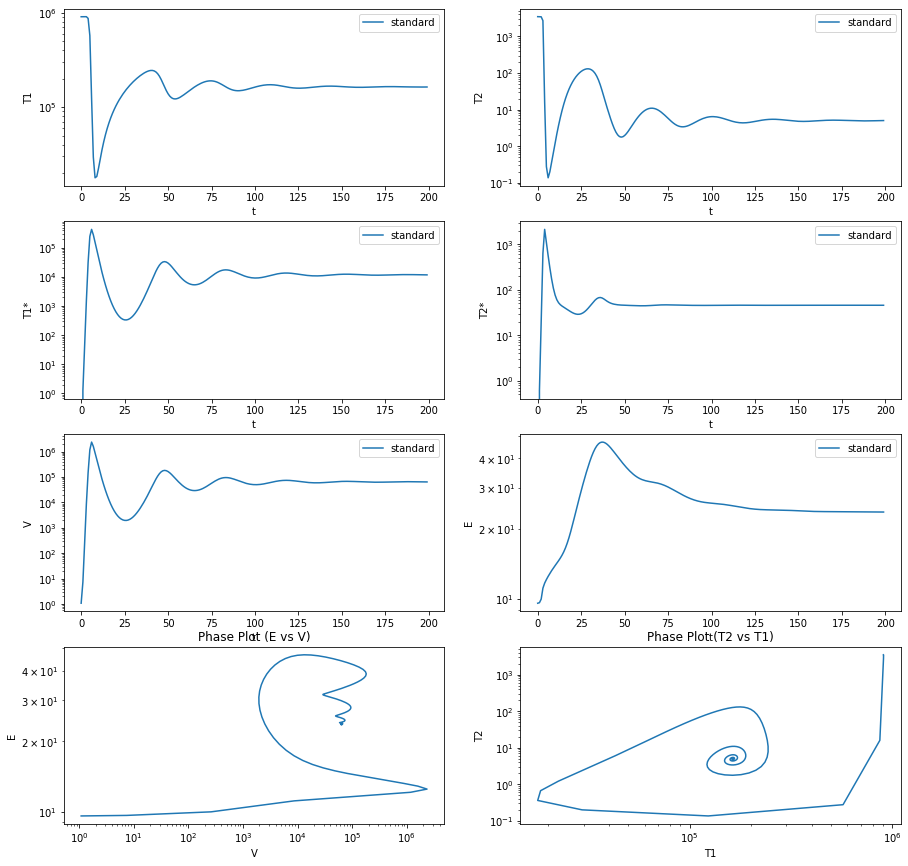

In [1778]:
h = HIVSimulator('standard')
h.reset('low',True)
dt = 1
max_time = 200
eps1, eps2 = 0,0
t = list(range(0,max_time,dt))
sol = h.simulate(eps1,eps2,t,derivs_dt)
sol_dict ={'standard':sol}

#visualize the state variables dynamics
visualize_plot(t,sol_dict)
#print the final state
print("Equilibria State (T1,T2,T1*,T2*,V,E) = ", np.round(sol[-1,:]))

#### Individual with stronger immune system

Now, we consider an individual with stronger immune system (higher T-cell birth rates and saturation constant)
Infect the individual with low viral count and observe the dynamics over t = 500 days. Here we assume that no drug is being administered to the patient ($\epsilon_1$, $\epsilon_2$ = 0)

Immune effector parameters
$(\lambda_E,m_1,m_2,b_E,K_b,d_E,K_d) = (100.0,1e^{-5},1e^{-5},0.6,500,0.25,500)$

Equilibria State (T1,T2,T1*,T2*,V,E) =  [917828.    277.    242.      9.   1280. 323822.]


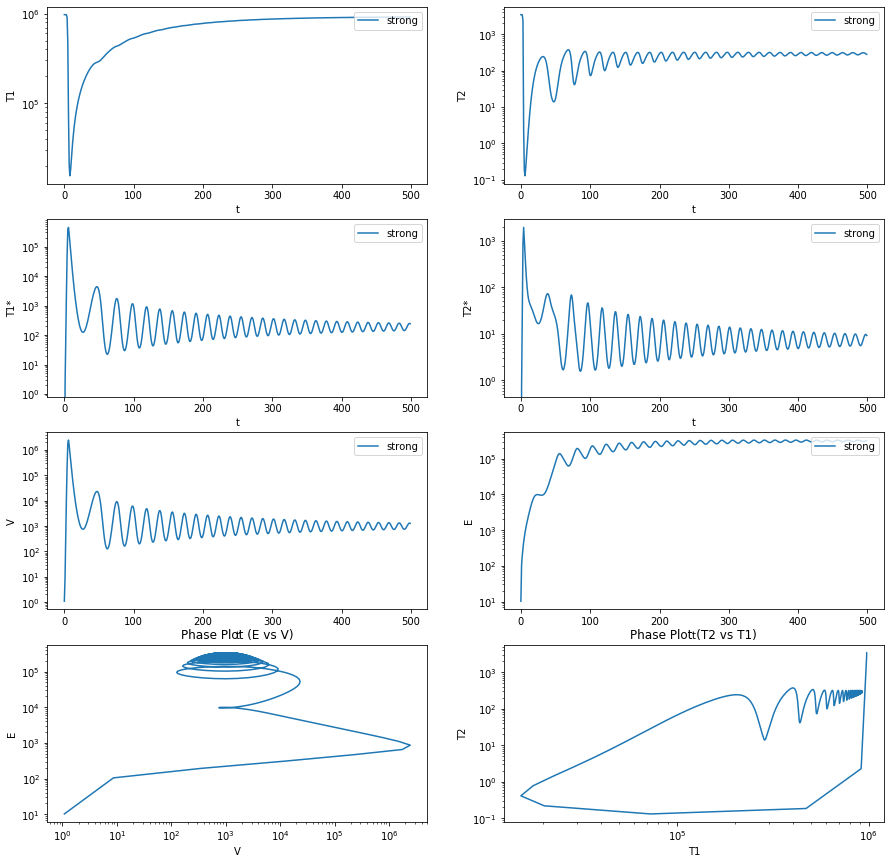

In [1780]:
h = HIVSimulator('strong')
h.reset('low',True)
dt = 1
max_time = 500
eps1, eps2 = 0,0
t = list(range(0,max_time,dt))
sol = h.simulate(eps1,eps2,t,derivs_dt)
    
#visualize the state variables dynamics
visualize_plot(t,{'strong':sol})
#print the final state
print("Equilibria State (T1,T2,T1*,T2*,V,E) = ", np.round(sol[-1,:]))

As observed, in both cases, the unstable steady state (healthy individual) transitions to stable steady state. The steady state for an individual with stronger immune system is much closer to fixed state 4 (described earlier) and his body is able to maintain a lower viral count without any treatment. Individual with standard immmune system transitions from healthy fixed state(1) to unhealthy fixed state(3) with high viral load and depleted immunity cells. Also, as evident from the phase plots, the stable fixed points exhibit a spiral behaviour.

**Exercise 1.4**(5 points) Simulate the effect of different drug combinations using different values for RT inhibitor and PT inhibitor efficacies ($\epsilon_1, \epsilon_2$)

As suggested by Adams _et_ al., we consider 4 drug combinations: ($\epsilon_1,\epsilon_2$) = (0,0);(0.3,0.7);(0.7,0.3);(0.7,0.7)

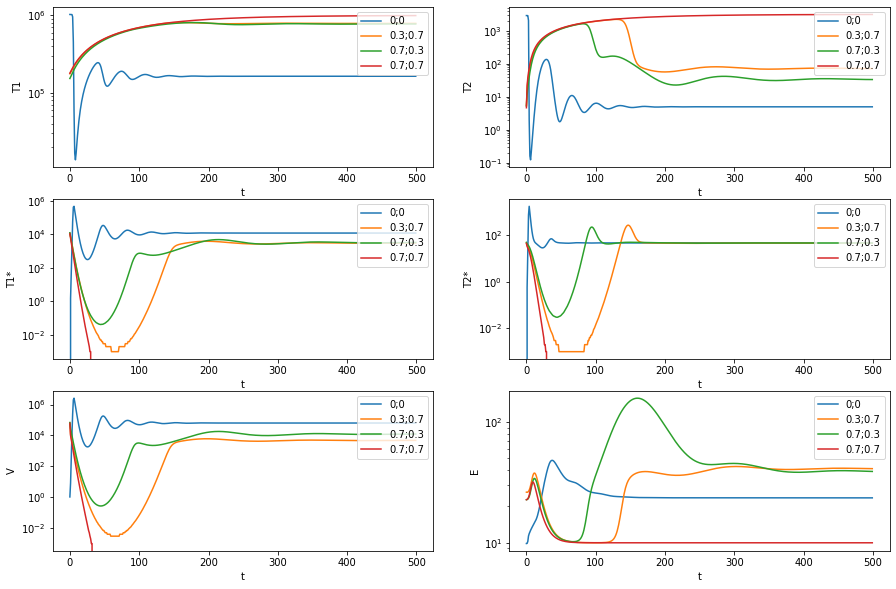

In [1783]:
h = HIVSimulator('standard')
h.reset('high',True)
dt = 1
max_time = 500
eps = [[0,0],[0.3,0.7],[0.7,0.3],[0.7,0.7]]
sols = {}
t = list(range(0,max_time,dt))
for eps1,eps2 in eps:
    label = '{};{}'.format(eps1,eps2)
    if eps1 > 0:
        h.reset('high',True)
    else:
        h.reset('low',True)
    sols[label] = np.round(h.simulate(eps1,eps2,t,derivs_dt),3)
    
t = list(range(0,max_time,dt))
visualize_plot(t,sols,False)

The simulation shows that treatment using high dosage of both drugs leads to much lower steady state viral load and healthy CD4 and macrophages count. Now we analyze the effect of varying RTI and PI inhibitors individually.

#### Evaluate effect of varying the RT inhibitor treatment efficacy ($\epsilon_1$)

We vary the RT/P inhibitor parameter value from 0 to 1 individually and observe the final viral load at equilibria. Our initial state is now an individual with high initial viral load state (steady state 4 equilibria highligted above). We do not include the effect of other drug while varying a particular drug.

/home/achoudhary/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


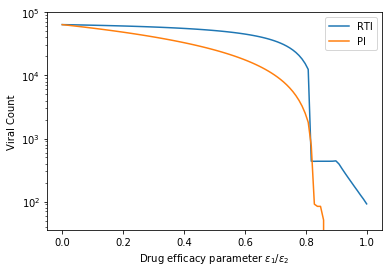

In [1784]:
h = HIVSimulator('standard')
efficacy = np.linspace(0,1,100)
viral_load_rt = []
viral_load_pt = []
max_time = 1000
dt = 1
t = list(range(0,max_time,dt))
for i in efficacy:
    h.reset('high',True)
    sol = h.simulate(i,0,t,derivs_dt)
    viral_load_rt.append(np.round(sol[-1,4]))
    h.reset('high',True)
    sol = h.simulate(0,i,t,derivs_dt)
    viral_load_pt.append(np.round(sol[-1,4]))

fig, ax = plt.subplots(1,1)
plt.plot(efficacy,np.array(viral_load_rt), label='RTI')
plt.plot(efficacy,np.array(viral_load_pt), label='PI')
plt.yscale('log',basey=10) 
plt.yticks([100,1000,10000,100000])
plt.ylabel("Viral Count")
plt.xlabel("Drug efficacy parameter $\epsilon_1/\epsilon_2$")
plt.legend(loc="upper right")
plt.show()

Increasing the drug efficacy beyond 0.8 leads to sudden drop in viral count. In case of PI, the viral count falls below the clinically detectable level of 43. Hence, now we focus on optimal drug dosage strategy with maximal range decided basis the computed curve above.

### 3.2 Determining ideal drug dosage for patient infected with high viral load

We saw that drug combination helps reduce and maintain viral load. However, their long term use can lead to complications and patients often experience side-effects which leads to poor compliance. Hence, we consider two drug scheduling strategies which essentially tries to vary drug efficacies ($\epsilon$) over time and maximize a reward function(objective). We assume that we control dosage by controlling the efficacy parameter. The most common cost function used in various studies is:

$J(\epsilon_1,\epsilon_2) = E_{t}[Q V(t) + R_1 \epsilon_1^2 + R_2 \epsilon_1^2 - SE(t)]$

where Q, R1, R2 and S are weight constants for the virus, controls inputs, and immune effectors, respectively. V and E are viral load and immune effector cell population. The objective is to mimimize the cost function, i.e. minimize the systemic costs of drug treatment and viral load while encouraging higher immunity cells population.

### Optimal Control

**Exercise 1.5**(10 points) Develop a drug dosage control algorithm using Optimal Control method.

Using the control model proposed by Adams et. al.[1] we determine the optimal dosage strategy. We attempt to control HIV populations in finite time intervals using a control function $\epsilon(t)$ which represents the drug efficacy satisfying $0<= a <= \epsilon(t) <= b< 1$. Here $\epsilon(t) = b$ represents maximum efficacy. We use the forward and backward integration along with optimal control parameter equation. We consider a patient with low viral load as considered by Adams et. al.[1] and only consider the scenario wherein RTI is administered i.e. we keep PI dosage to be zero ($\epsilon_2$ = 0) & consider the simpler cost function used by Adams et. al. [1]: 

$
J(\epsilon_1,\epsilon_2) = E_{t}[Q V(t) + R_1 \epsilon_1^2]
$

#### Step 1
We simulate the process on forward directions using our earlier simulation model and assuming a random value for $\epsilon_1$ to begin with. Using the final state at t=200, we introduce adjoint variables and perform backward integration to reach t = 0 and determine the ideal control parameter for this iteration. We keep iterating until the control parameter value stabilizes. 

Writing the equations for backward integration

In [1785]:
def derivs_dt_inv(s,t,state_1,Q,eps1=0,eps2=0,f=0.34,params=None):
    e1,e2,e3,e4,e5,e6 = s
    t1,t2,t11,t21,v,e = state_1
    if params is None:
        lambda1 = 1e4     
        lambda2 = 31.98   
        d1 = 0.01         
        d2 = 0.01         
        f = f           
        k1 = 8e-7         
        k2 = 1e-4         
        delta = .7       

        NT = 100.         
        c = 13.           
        rho1 = 1.         
        rho2 = 1.         
        deltaE = 0.1      
        lambdaE = 1
        m1 = 1e-5
        m2 = 1e-5
        bE = 0.3
        Kb = 100
        d_E = 0.25
        Kd = 500
    else:
        lambda1,lambda2,d1,d2,k1,k2,delta,NT,c,rho1,rho2,deltaE,lambdaE,m1,m2,bE,Kb,d_E,Kd = params

    ds_inv = s.copy()
    tmp1 = bE*e*Kb/(t11+t21+Kb)**2 - d_E*e*Kd/(t11+t21+Kb)**2
    tmp2 = e5*NT*delta + e6*tmp1
    ds_inv[0] = -(e1*(-d1 - (1-eps1)*k1*v) + e3*(1-eps1)*k1*v -e5*(1-eps1)*rho1*k1*v)
    ds_inv[1] = -(e2*(-d2 - (1-f*eps1)*k2*v) + e4*(1-f*eps1)*k2*v -e5*(1-f*eps1)*rho2*k2*v)
    ds_inv[2] = -(e3*(-delta - m1*e) + tmp2)
    ds_inv[3] = -(e4*(-delta - m2*e) + tmp2)
    ds_inv[4] = -(Q - e1*(1-eps1)*k1*t1 + e2*(1 - f*eps1)*k2*t2 + e3*(1 - eps1)*k1*t1 + \
                 e4*(1 - f*eps1)*k2*t2 + e5*(-c - (1 - eps1)*rho1*k1*t1 - (1 - f*eps1)*rho2*k2*t2))
    ds_inv[5] = -(-e3*m1*t11 -e4*m2*t21 + e6*(bE*(t11+t21)/(t11+t21+Kb) - d_E*(t11+t21)/(t11+t21+Kd) - deltaE))
    return ds_inv

#### Solving the HIV model to determine optimal control parameter

In this case, we update our simulator class to include the forward and backward state variable and customize the simulation function to account for both forward and backward cases. The $\epsilon_1$ parameter is constrained to be between 0 and 0.8. 

In [1797]:
class HIVSimulator():
    def __init__(self, immunity_type):
        # immunity of the individual      
        if immunity_type == 'strong':
            self.params = (1e4,31.98,0.01,0.01,8e-7,1e-4,0.7,100.,13.,1.0,1.0,0.1,100.0,1e-5,1e-5,0.5,500,0.25,1000)
        else:
            self.params = (1e4,31.98,0.01,0.01,8e-7,1e-4,0.7,100.,13.,1.0,1.0,0.1,1.0,1e-5,1e-5,0.3,100,0.25,500)
        
        self.f_state = []
        self.b_state = []
        
    def simulate(self,eps1,eps2,t,derivs,Q=None,state=None, backward=False):
        if backward:
            deriv_args = (state,Q,eps1,eps2,0.34,self.params)   
            s = self.b_state
        else:
            deriv_args = (eps1,eps2,0.34,self.params)    
            s = self.f_state
        #solving the ode using odeint
        sol = odeint(derivs, s, t, args=deriv_args)
        return sol
    
    def reset(self, state_type, randomize):
        """Reset the environment."""
        self.t = 0
        if state_type == 'low':
            self.f_state = [1000000., 3198., 0., 0., 1., 10.]
        elif state_type == 'high':
            self.f_state = [163573., 5., 11945., 46., 63919., 24.]
        elif state_type == 'early':
            self.f_state = [1000000., 3198., 1e-4, 1e-4, 1., 10.]
        if randomize:
            self.f_state = self.f_state + (self.f_state * np.random.uniform(-0.1,0.1,6))
        return self.f_state

In [1846]:
#solving the HIV equations
a = 0.0
b = 0.8
R = 10000

h = HIVSimulator('standard')

t = list(range(0,200))
t_inv = t[::-1]
error = 1000
eps_init = np.random.uniform(a,b) * np.ones(len(t))

obj_init = 1e20
obj_best = float("Inf")
counter = 0
while counter < 400:
    f_states = np.zeros((len(t)+1,6))
    f_states[0] = init_state
    h.reset('low',False)
    for t_it in t:
        f_states[t_it+1] = h.simulate(eps_init[t_it],0,[t_it,t_it+1],derivs_dt)[-1,:]
        h.f_state = f_states[t_it+1]
    v = f_states[1:,4]
    t1 = f_states[1:,0]
    t2 = f_states[1:,1]
    obj_new = np.sum(Q*v+R*eps_init**2)
    
    if obj_new < obj_best and counter>5:
        eps_best = eps_init.copy()
        v_best = v.copy()
        
    error = abs(obj_new - obj_init)/obj_init
    r_states = np.zeros((len(t)+1,6))
    for t_it in t_inv: 
        h.b_state = r_states[t_it+1]
        r_states[t_it] = h.simulate(eps_init[t_it],0,[t_it+1,t_it],derivs_dt_inv,Q,list(f_states[t_it+1]),True)[-1,:]
        h.r_state = r_states[t_it]
    
    e1 = r_states[:-1,0]
    e2 = r_states[:-1,1]
    e3 = r_states[:-1,2]
    e4 = r_states[:-1,3]
    e5 = r_states[:-1,4]
    e6 = r_states[:-1,5]
    eps_new = np.maximum(a, np.minimum(b, (-(e1-e3+rho1*e5)*k1*v*t1 - (e2-e4+rho2*e5)*f*k2*v*t2)/(2*R)))
    error = np.linalg.norm(eps_new - eps_init)/np.linalg.norm(eps_init)    
    eps_init = eps_new.copy()
    obj_init = obj_new
    counter+= 1

In [1847]:
# patient with epsilon1  = 0.8 (strong drug efficacy)
max_time = 200
dt = 1
h.reset('early',False)
t = list(range(0,max_time,dt))
full_eps = h.simulate(0.8,0,t,derivs_dt)

# patient with no drug being given
h.reset('early',False)
no_eps = h.simulate(0,0,t,derivs_dt)

### Compare viral load for optimal control parameter with $\epsilon_1 = 0$ and $\epsilon_1 = 0.8$

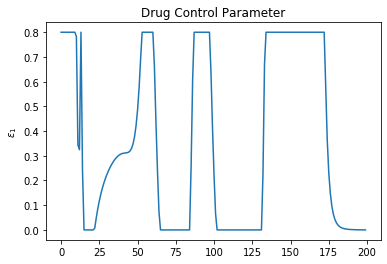

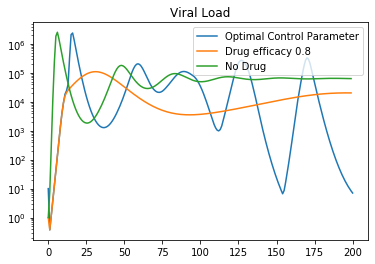

In [1848]:
plt.title("Drug Control Parameter")
plt.plot(eps_init)
plt.ylabel('$\epsilon_1$')
plt.show()
plt.plot(f_states[:,4], label = 'Optimal Control Parameter')
plt.plot(full_eps[:,4], label = 'Drug efficacy 0.8')
plt.plot(no_eps[:,4], label = 'No Drug')
plt.legend(loc="upper right")
plt.title("Viral Load")
plt.yscale('log',basey=10)

As observed, the optimal control model tries to control the drug dosage for RTI (plot 1) and is able to minimize the viral load below 'no drug' scenario to certain extent. However, the viral load still jumps to quite high levels intermittently and thus, we focus on reinforcement learning-based optimization.

### Reinforcement Learning

**Exercise 1.6**(10 point) Develop a drug dosage control algorithm using Reinforcement Learning(RL).

To simulate this scenario, we use our simulation model to generate trajectories for RL model. Then, we train a Policy Gradient based Reinforcement Learning model using batch data without access to the underlying simulation model to determine the optimal drug dosage for RTI and PI, both. In line with Adams et. al.[2], we consider 4 possible actions:

1. Action 0: no drug, costs 0 ($\epsilon_1$ = 0, $\epsilon_2$ = 0)
2. Action 1: protease inhibitor only ($\epsilon_1$ = 0, $\epsilon_2$ = 0.3)
3. Action 2: RT inhibitor only, ($\epsilon_1$ = 0.7, $\epsilon_2$ = 0.0)
4. Action 3: both RT inhibitor and protease inhibitor, c($\epsilon_1$ = 0.7, $\epsilon_2$ = 0.3)

The reward at each step is defined based on the current state and the action. In this case, we use the full cost function:
$J(\epsilon_1,\epsilon_2) = E_{t}[Q V(t) + R_1 \epsilon_1^2 + R_2 \epsilon_1^2 - SE(t)]$

Here we use the following parameters in our objective:R1 =20000 , R2 = 2000, Q=0.1 , S=1000

#### Define Simulator for RL
We define our class to perform simulation. This is an updated version of our HIVSimulator class defined earlier

In [1823]:
class HIVRL(object):
    state_names = ("T1", "T2", "T1*", "T2*", "V", "E")
    eps_values_for_actions = np.array([[0., 0.], [.7, 0.], [0., .3], [.7, .3]])

    def __init__(self,dt=1, derivs=None):
        self.statespace_limits = np.array([[0., 1e8]] * 6)
        self.model_derivatives = dsdt
        self.dt = dt
        self.state = []
        self.reward_bound = 1e300
        self.num_actions = 4
        self.reset('high',False)
        
    def reset(self, state_type, randomize=False):
        """Reset the environment."""
        self.t = 0
        if state_type == 'low':
            self.state = [1000000., 3198., 0., 0., 1., 10.]
        elif state_type == 'high':
            self.state = [163573., 5., 11945., 46., 63919., 24.]
        elif state_type == 'early':
            self.state = [1000000., 3198., 1e-4, 1e-4, 1., 10.]
        if randomize:
            self.state = self.f_state + (self.f_state * np.random.uniform(-0.1,0.1,6))
        self.state = np.array(self.state)
        return self.state

    def observe(self):
        return self.state

    def is_done(self, episode_length=200):
        ##Check if the episode is complete
        return True if self.t >= episode_length else False

    def calc_reward(self, action=0, state=None, **kw ):
        #define the reward function
        eps1, eps2 = self.eps_values_for_actions[action]
        if state is None:
            state = self.observe()
        T1, T2, T1s, T2s, V, E = state
        
        reward = -0.1*V - 2e4*eps1**2 - 2e3*eps2**2 + 1e3*E
        
        # Constrain reward to be within specified range
        if np.isnan(reward):
            reward = -self.reward_bound
        elif reward > self.reward_bound:
            reward = self.reward_bound
        elif reward < -self.reward_bound:
            reward = -self.reward_bound
        return reward


    def step(self, action):
        self.t += 1
        self.action = action
        eps1, eps2 = self.eps_values_for_actions[action]
        r = ode(self.model_derivatives).set_integrator('vode',nsteps=10000,method='bdf')
        t0 = 0
        deriv_args = (eps1, eps2)
        r.set_initial_value(self.state, t0).set_f_params(deriv_args)
        self.state = r.integrate(self.dt)
        reward = self.calc_reward(action=action)
        done = self.is_done()
        return self.state, reward, done

def dsdt(t, s, params):
    derivs = np.empty_like(s)
    eps1,eps2 = params 
    T1, T2, T1s, T2s, V, E = s
        
    # baseline model parameter constants
    lambda1 = 1e4     
    lambda2 = 31.98   
    d1 = 0.01         
    d2 = 0.01         
    f = .34           
    k1 = 8e-7         
    k2 = 1e-4         
    delta = .7        
    m1 = 1e-5         
    m2 = 1e-5         
    NT = 100.         
    c = 13.           
    rho1 = 1.         
    rho2 = 1.         
    lambdaE = 1.      
    bE = 0.3          
    Kb = 100.         
    d_E = 0.25        
    Kd = 500.         
    deltaE = 0.1
    out = s.copy()

    # compute derivatives
    tmp1 = (1. - eps1) * k1 * V * T1
    tmp2 = (1. - f * eps1) * k2 * V * T2
    out[0] = lambda1 - d1 * T1 - tmp1
    out[1] = lambda2 - d2 * T2 - tmp2
    out[2] = tmp1 - delta * T1s - m1 * E * T1s
    out[3] = tmp2 - delta * T2s - m2 * E * T2s
    out[4] = (1. - eps2) * NT * delta * (T1s + T2s) - c * V - ((1. - eps1) * rho1 * k1 * T1 + (1. - f * eps1) * rho2 * k2 * T2) * V
    out[5] = lambdaE + bE * (T1s + T2s) / (T1s + T2s + Kb) * E - d_E * (T1s + T2s) / (T1s + T2s + Kd) * E - deltaE * E
    return out    

#### Policy Gradient-based RL
For a given state $s$, a policy can be written as a probability distribution $\pi_\theta(s, a)$ over actions $a$, where $\theta$ is the parameter of the policy.

The reinforcement learning objective is to learn a $\theta^*$ that maximizes the objective function

   $\;\;\;\; J(\theta) = E_{\tau \sim \pi_\theta}[r(\tau)]$,

where $\tau$ is the trajectory sampled according to policy $\pi_\theta$ and $r(\tau)$ is the sum of discounted rewards on trajectory $\tau$.

The policy gradient approach is to take the gradient of this objective

   $\;\;\;\; \nabla_\theta J(\theta) = \nabla_\theta \int \pi_\theta(\tau)r(\tau)d\tau = \int \pi_\theta(\tau) \nabla_\theta \log\pi_\theta(\tau)r(\tau)d\tau  = E_{\tau \sim \pi_\theta(\tau)}[\nabla_\theta \log \pi_\theta(\tau)r(\tau)]$

We sample trajectories $\tau^{(i)} = \{s_0^{(i)}, a_0^{(i)}, s_1^{(i)}, a_1^{(i)}, \cdots\} \sim \pi_\theta(\tau)$ and compute the gradient (w.r.t. $\theta$) of loss function

$\;\;\;\; Loss = -\frac{1}{N} \sum_i [\sum_{t=0}^T \log \pi_\theta(a_t^{(i)} \mid s_t^{(i)}) \;Q_t^{(i)}]$.

#### Define policy and episode generation functions
We refer one simulation trajectory as an episode. For reinforcement learning, in each iteration, we generate 10 trajectories using the action proposed by our policy agent. We use a one-layer perceptron network as our policy agent and use epsilon-greedy framework for taking actions using our policy i.e. select action recommended by trained policy agent with certain probability, otherwise select action randomly.

In [1831]:
import matplotlib.pylab as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

class PolicyGradient(nn.Module):
    def __init__(self, outputs):
        super(PolicyGradient, self).__init__()
        self.network = nn.Sequential(
            nn.BatchNorm1d(num_features=6, affine=False),
            nn.Linear(6,10),
            nn.ReLU(),
            nn.Linear(10, outputs))
        
    def forward(self, x):
        x=x.double()
        x = self.network(x)
        return x
    
def sample_episode(env, policy, max_episode_length,epsilon):
    ob = env.reset('high')
    obs, acs, log_p, rewards, next_obs, terminals = [], [], [], [], [], []
    steps = 0
    while True:
        # use the most recent observation
        obs.append(ob)
        ac = sample_action(policy, ob, epsilon)
        acs.append(ac)
        # take that action and record results
        ob, rew, done = env.step(ac)
        # record result of taking that action
        steps += 1
        next_obs.append(ob)
        rewards.append(rew)
        if done or steps > max_episode_length:
            rollout_done = 1
        else:
            rollout_done = 0
        terminals.append(rollout_done)
        if rollout_done:
            break
    return obs, acs, rewards, next_obs, terminals

    
def sample_action(policy_net, obs, epsilon):
        if np.random.random() < epsilon:
            return np.random.randint(4)
        obs = torch.tensor(obs.reshape(1, -1), dtype=torch.float64)
        return (
            torch.distributions.Categorical(logits=policy_net.eval().double().forward(obs))
            .sample()
            .item()
        )
    
def sample_batch_episodes(env, policy, episodes_per_batch, max_episode_length,epsilon):
    episode_count = 0
    episodes = []
    for i in range(episodes_per_batch):
        episode = sample_episode(env, policy, max_episode_length,epsilon)
        episodes.append(episode)
    return episodes

def log_prob(policy_net,obs, action):
        log_probs = nn.functional.log_softmax(policy_net.forward(obs), dim=1)[:,]
        action_one_hot = nn.functional.one_hot(action, num_classes=4)
        return torch.sum(log_probs * action_one_hot, dim=1)

def reward_discounted(gamma,rewards):
    all_discounted_cumsums = []
    # for loop over steps (t) of the given rollout
    for start_time_index in range(len(rewards)):
        indices = np.arange(start_time_index, len(rewards))
        discounts = gamma ** (indices - start_time_index)
        all_discounted_cumsums.append(sum(discounts * rewards[start_time_index:]))
    return np.array(all_discounted_cumsums)

#### Learn RL-based treatment policy by simulating the model and applying policy gradient-based updates for 200 iterations

In [ ]:
n_iter = 200
batch_size = 10
max_episode_length = 100
epsilon = 1.0
GAMMA = 0.999
learning_rate = 1e-3

policy_net = PolicyGradient(4).double()
avg_rewards = np.zeros(n_iter)
avg_episode_lengths = np.zeros(n_iter)
env = HIVRL()
log_loss = np.zeros(n_iter)
optimizer = optim.Adam(policy_net.parameters(), lr=learning_rate)
policy_net.train()

for itr in range(n_iter):
    if itr % 10 == 0:
        print(f"*****Iteration {itr}*****")
    episodes = sample_batch_episodes(env, policy_net, batch_size, max_episode_length,epsilon)
    total_reward = 0
    obs = np.concatenate([tau[0] for tau in episodes], axis=0).astype(np.float64)
    acs = np.concatenate([tau[1] for tau in episodes], axis=0).astype(np.int64)
    obs = torch.from_numpy(obs)
    acs = torch.from_numpy(acs)
    
    disc_rewards = []
    for e in episodes:
        total_reward += np.sum(e[2])
        
    disc_rewards = np.concatenate([reward_discounted(GAMMA,tau[2]) for tau in episodes], axis=0).astype(np.int64)
    log_ps = log_prob(policy_net,obs,acs)
    
    avg_reward = total_reward/batch_size
    
    advantage = (disc_rewards - disc_rewards.mean())/disc_rewards.std() + 1e-8 #np.standardize(disc_rewards) + 1e-8
    loss = -torch.mean(log_ps * torch.tensor(advantage, dtype=torch.float64))
    print(loss.item(),avg_reward)
    avg_rewards[itr] = avg_reward
    # Update network weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    log_loss[itr] = loss.item()
    # Update rule for epsilon s.t. after 100 iterations it's around 0.05.
    epsilon = np.maximum(0.05,epsilon*0.97)

#### Plotting the reward and loss curves

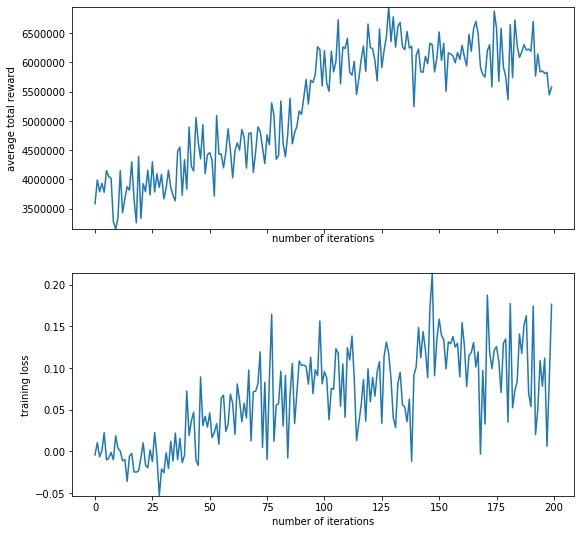

In [1834]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=[9, 9])
ax1.plot(avg_rewards)
ax1.set_xlabel("number of iterations")
ax1.set_ylabel("average total reward")
ax1.set_ylim(avg_rewards.min(), avg_rewards.max())
ax2.plot(log_loss)
ax2.set_xlabel("number of iterations")
ax2.set_ylabel("training loss")
ax2.set_ylim(log_loss.min(), log_loss.max())
plt.show()

#### Plot the state space dynamics and drug dosages across time

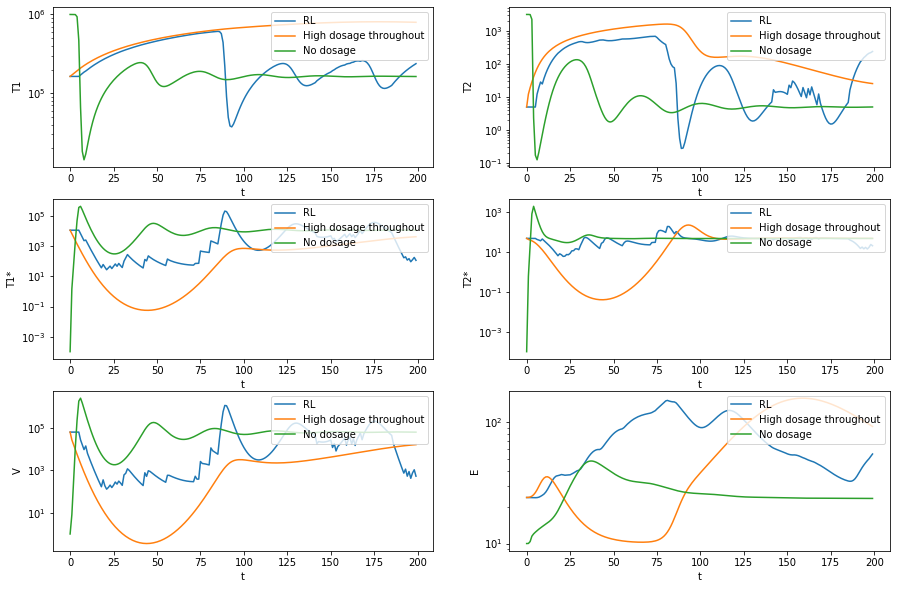

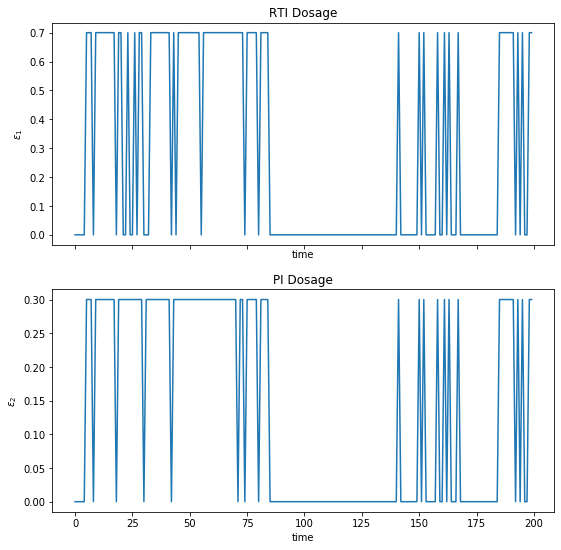

In [1842]:
max_time = 200
dt = 1
episode = sample_episode(env, policy_net, max_time, 0)
obs = np.array(episode[0])[:max_time]

# patient with high drug dosage

h.reset('high',False)
t = list(range(0,max_time,dt))
full_eps = h.simulate(0.7,0.3,t,derivs_dt)

# patient with no drug being given
h.reset('early',False)
no_eps = h.simulate(0,0,t,derivs_dt)

sols = {'RL':obs, 'High dosage throughout':full_eps, 'No dosage':no_eps}
visualize_plot(t,sols,False)

#plotting the dosage strategy
eps1 = []
eps2 = []
for i in episode[1][:max_time]:
    if i in [1,3]:
        eps1.append(0.7)
    else:
        eps1.append(0.0)
    if i in [2,3]:
        eps2.append(0.3)
    else:
        eps2.append(0.0)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=[9, 9])
ax1.plot(eps1)
ax1.set_xlabel("time")
ax1.set_ylabel("$\epsilon_1$")
ax1.set_title("RTI Dosage")
ax2.plot(eps2)
ax2.set_xlabel("time")
ax2.set_ylabel("$\epsilon_2$")
ax2.set_title("PI Dosage")
plt.show()

As observed, the reinforcement learning-based model is able to optimize the dosage for both RTI and PI and is able to consistently keep the viral load below the 'no drug scenario' and close to the 'full drug' scenario. CD4 cells count is also mainted quite well using RL-based treatment policy. The model tries to keep RTI and PI dosages to minimal and tries to minimize viral load taking help from the immune system cells(E).

### References
1. Adams, Brian Michael, et al. "HIV dynamics: modeling, data analysis, and optimal treatment protocols." Journal of Computational and Applied Mathematics 184.1 (2005): 10-49.
2. Adams, Brian Michael, et al. Dynamic multidrug therapies for HIV: Optimal and STI control approaches. North Carolina State University. Center for Research in Scientific Computation, 2004.